In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Data Preprocessing

### Data Loading

In [4]:
AAPL = pd.read_csv("AAPL_stock_data.csv")
GOOG = pd.read_csv("GOOG_stock_data.csv")
AMZN = pd.read_csv("AMZN_stock_data.csv")

In [5]:
AAPL = AAPL.iloc[2:]  # Remove the first two rows
AAPL.reset_index(drop=True, inplace=True)  # Reset the index

In [6]:
AAPL.columns = ['Date','Close','High','Low','Open','Volume']
AAPL.head()

,Date,Close,High,Low,Open,Volume
0,2014-11-03,24.199203491210938,24.39828319654341,23.891736602603952,23.938188252578744,209130400
1,2014-11-04,24.02223777770996,24.21910497163765,23.827583048774805,24.19034967719996,166297600
2,2014-11-05,24.079750061035156,24.177078269338512,23.91827386886062,24.132837407556842,149743600
3,2014-11-06,24.148622512817383,24.16861765441486,23.948681266449277,24.126407007102532,139874000
4,2014-11-07,24.217487335205078,24.286355895906567,24.115294675961746,24.159725677394825,134766000


In [7]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1933 non-null   object
 1   Close   1933 non-null   object
 2   High    1933 non-null   object
 3   Low     1933 non-null   object
 4   Open    1933 non-null   object
 5   Volume  1933 non-null   object
dtypes: object(6)
memory usage: 90.7+ KB


In [8]:
# Drop NULL rows
AAPL.dropna(inplace = True)
AAPL

,Date,Close,High,Low,Open,Volume
0,2014-11-03,24.199203491210938,24.39828319654341,23.891736602603952,23.938188252578744,209130400
1,2014-11-04,24.02223777770996,24.21910497163765,23.827583048774805,24.19034967719996,166297600
2,2014-11-05,24.079750061035156,24.177078269338512,23.91827386886062,24.132837407556842,149743600
3,2014-11-06,24.148622512817383,24.16861765441486,23.948681266449277,24.126407007102532,139874000
4,2014-11-07,24.217487335205078,24.286355895906567,24.115294675961746,24.159725677394825,134766000
...,...,...,...,...,...,...
1928,2022-07-01,136.73629760742188,136.84456131567046,133.51794149629842,133.89193111018585,71051600
1929,2022-07-05,139.32476806640625,139.3739815709903,134.76787086684834,135.59461869744254,73353800
1930,2022-07-06,140.6632843017578,141.84433323860637,138.85234159739986,139.11808248899268,74064300
1931,2022-07-07,144.0391387939453,144.23597778940012,141.0176069003368,141.0274435938611,66253700


In [9]:
# Change Dtype of Columns
AAPL["Date"] = pd.to_datetime(AAPL["Date"])

for col in ["Open", "High", "Low", "Close", "Volume"]:
  AAPL[col] = AAPL[col].str.replace(',', '')

AAPL = AAPL.astype({"Open": float, "High": float, "Low": float, "Close": float,  "Volume": float})

In [10]:
# Sort the Database by Date
AAPL = AAPL.sort_values(by = 'Date', ignore_index = True)

In [11]:
AAPL.describe()

,Date,Close,High,Low,Open,Volume
count,1933,1933.000000,1933.000000,1933.000000,1933.000000,1.933000e+03
mean,2018-09-05 03:27:05.866528512,64.616327,65.300049,63.873724,64.573651,1.360602e+08
min,2014-11-03 00:00:00,20.647459,20.951433,20.448619,20.569750,4.100000e+07
25%,2016-10-04 00:00:00,28.169348,28.374542,27.962260,28.193880,8.911160e+07
50%,2018-09-05 00:00:00,43.506359,43.881211,43.179911,43.511122,1.167360e+08
75%,2020-08-06 00:00:00,105.894775,107.695529,103.974968,105.591494,1.632172e+08
max,2022-07-08 00:00:00,178.645630,179.558489,175.809091,179.254221,6.488252e+08
std,NaN,45.936433,46.507724,45.319437,45.908030,6.875853e+07


### Google

In [13]:
GOOG.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
1,Date,NaN,NaN,NaN,NaN,NaN
2,2014-11-03,27.554479598999023,27.687482289519856,27.455719472658696,27.568375572488396,27645693
3,2014-11-04,27.499391555786133,27.568375952999265,27.260680748885495,27.444305030611236,24884132
4,2014-11-05,27.092941284179688,27.63289484256096,27.000136291743587,27.63289484256096,40645286


In [14]:
GOOG = GOOG.iloc[2:]  # Remove the first two rows
GOOG.reset_index(drop=True, inplace=True)  # Reset the index
GOOG

,Price,Close,High,Low,Open,Volume
0,2014-11-03,27.554479598999023,27.687482289519856,27.455719472658696,27.568375572488396,27645693
1,2014-11-04,27.499391555786133,27.568375952999265,27.260680748885495,27.444305030611236,24884132
2,2014-11-05,27.092941284179688,27.63289484256096,27.000136291743587,27.63289484256096,40645286
3,2014-11-06,26.90038299560547,27.140830807484086,26.847280251732606,27.072095092682364,26665008
4,2014-11-07,26.849267959594727,27.10733254507448,26.733137852032336,27.10733254507448,32675465
...,...,...,...,...,...,...
1928,2022-07-01,108.56678009033203,109.28871013062435,106.60009726160429,107.82628411703544,31028000
1929,2022-07-05,113.35012817382812,113.51494354867297,105.74862743260198,107.00767110258128,36398000
1930,2022-07-06,114.67037200927734,115.80350141242428,111.72134246474683,113.55416076535447,28852000
1931,2022-07-07,118.74356842041016,119.29694708692082,114.98934719205599,115.46111928673244,32184000


In [15]:
GOOG.rename(columns={'Price': 'Date'}, inplace=True)


In [16]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1933 non-null   object
 1   Close   1933 non-null   object
 2   High    1933 non-null   object
 3   Low     1933 non-null   object
 4   Open    1933 non-null   object
 5   Volume  1933 non-null   object
dtypes: object(6)
memory usage: 90.7+ KB


In [17]:

# Drop NULL rows
GOOG.dropna(inplace = True)

In [18]:
# Change Dtype of Columns
GOOG["Date"] = pd.to_datetime(GOOG["Date"])

for col in ["Open", "High", "Low", "Close", "Volume"]:
  GOOG[col] = GOOG[col].str.replace(',', '')

GOOG = GOOG.astype({"Open": float, "High": float, "Low": float, "Close": float,  "Volume": float})

In [19]:
# Sort the Database by Date
GOOG = GOOG.sort_values(by = 'Date', ignore_index = True)

In [20]:
GOOG.describe()

,Date,Close,High,Low,Open,Volume
count,1933,1933.000000,1933.000000,1933.000000,1933.000000,1.933000e+03
mean,2018-09-05 03:27:05.866528512,64.496386,65.121622,63.836768,64.469276,3.333227e+07
min,2014-11-03 00:00:00,24.444292,24.614318,24.196648,24.548513,6.936000e+06
25%,2016-10-04 00:00:00,38.528011,38.815156,38.320991,38.567325,2.385000e+07
50%,2018-09-05 00:00:00,54.884544,55.454841,54.368484,54.895986,2.941800e+07
75%,2020-08-06 00:00:00,75.083870,75.576536,74.053495,74.646445,3.808600e+07
max,2022-07-08 00:00:00,149.998535,151.382974,149.180909,151.147578,2.232980e+08
std,NaN,33.987353,34.371850,33.608838,33.991790,1.595759e+07


### Amazon

In [22]:
AMZN.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
1,Date,NaN,NaN,NaN,NaN,NaN
2,2014-11-03,15.28600025177002,15.400500297546387,15.161999702453613,15.312000274658203,64850000
3,2014-11-04,15.14050006866455,15.212499618530273,15.008500099182129,15.19950008392334,68548000
4,2014-11-05,14.826000213623047,15.199999809265137,14.708000183105469,15.150500297546387,93490000


In [23]:
AMZN = AMZN.iloc[2:]  # Remove the first two rows
AMZN.reset_index(drop=True, inplace=True)  # Reset the index
AMZN


,Price,Close,High,Low,Open,Volume
0,2014-11-03,15.28600025177002,15.400500297546387,15.161999702453613,15.312000274658203,64850000
1,2014-11-04,15.14050006866455,15.212499618530273,15.008500099182129,15.19950008392334,68548000
2,2014-11-05,14.826000213623047,15.199999809265137,14.708000183105469,15.150500297546387,93490000
3,2014-11-06,14.831999778747559,14.850000381469727,14.614500045776367,14.834500312805176,75162000
4,2014-11-07,14.993000030517578,14.999500274658203,14.814499855041504,14.890999794006348,52948000
...,...,...,...,...,...,...
1928,2022-07-01,109.55999755859375,109.75,105.8499984741211,106.29000091552734,73021200
1929,2022-07-05,113.5,114.08000183105469,106.31999969482422,107.5999984741211,76583700
1930,2022-07-06,114.33000183105469,115.4800033569336,112.01000213623047,113.20999908447266,66958900
1931,2022-07-07,116.33000183105469,116.98999786376953,113.48999786376953,113.8499984741211,57872300


In [24]:
AMZN.rename(columns={'Price': 'Date'}, inplace=True)


In [25]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1933 non-null   object
 1   Close   1933 non-null   object
 2   High    1933 non-null   object
 3   Low     1933 non-null   object
 4   Open    1933 non-null   object
 5   Volume  1933 non-null   object
dtypes: object(6)
memory usage: 90.7+ KB


In [26]:
# Drop NULL rows
AMZN.dropna(inplace = True)

In [27]:

# Change Dtype of Columns
AMZN["Date"] = pd.to_datetime(AMZN["Date"])

for col in ["Open", "High", "Low", "Close", "Volume"]:
  AMZN[col] = AMZN[col].str.replace(',', '')

AMZN = AMZN.astype({"Open": float, "High": float, "Low": float, "Close": float, "Volume": float})

In [28]:
# Sort the Database by Date
AMZN = AMZN.sort_values(by = 'Date', ignore_index = True)

In [29]:
AMZN.describe()

,Date,Close,High,Low,Open,Volume
count,1933,1933.000000,1933.000000,1933.000000,1933.000000,1.933000e+03
mean,2018-09-05 03:27:05.866528512,85.220843,86.202799,84.209663,85.262972,8.340377e+07
min,2014-11-03 00:00:00,14.347500,14.539500,14.262500,14.314000,1.762600e+07
25%,2016-10-04 00:00:00,38.387001,38.602001,38.099998,38.369499,5.616800e+07
50%,2018-09-05 00:00:00,82.940498,83.847504,81.588997,82.816002,7.206600e+07
75%,2020-08-06 00:00:00,124.281502,125.610001,122.265503,123.893501,9.761400e+07
max,2022-07-08 00:00:00,186.570496,188.654007,184.839493,187.199997,4.771220e+08
std,NaN,51.428881,52.114704,50.783509,51.490116,4.203569e+07


### Exploratory Data Analysis

In [31]:
Companies = [AAPL, GOOG, AMZN]
Companies_Title = ["Apple", "Google", "Amazon"]

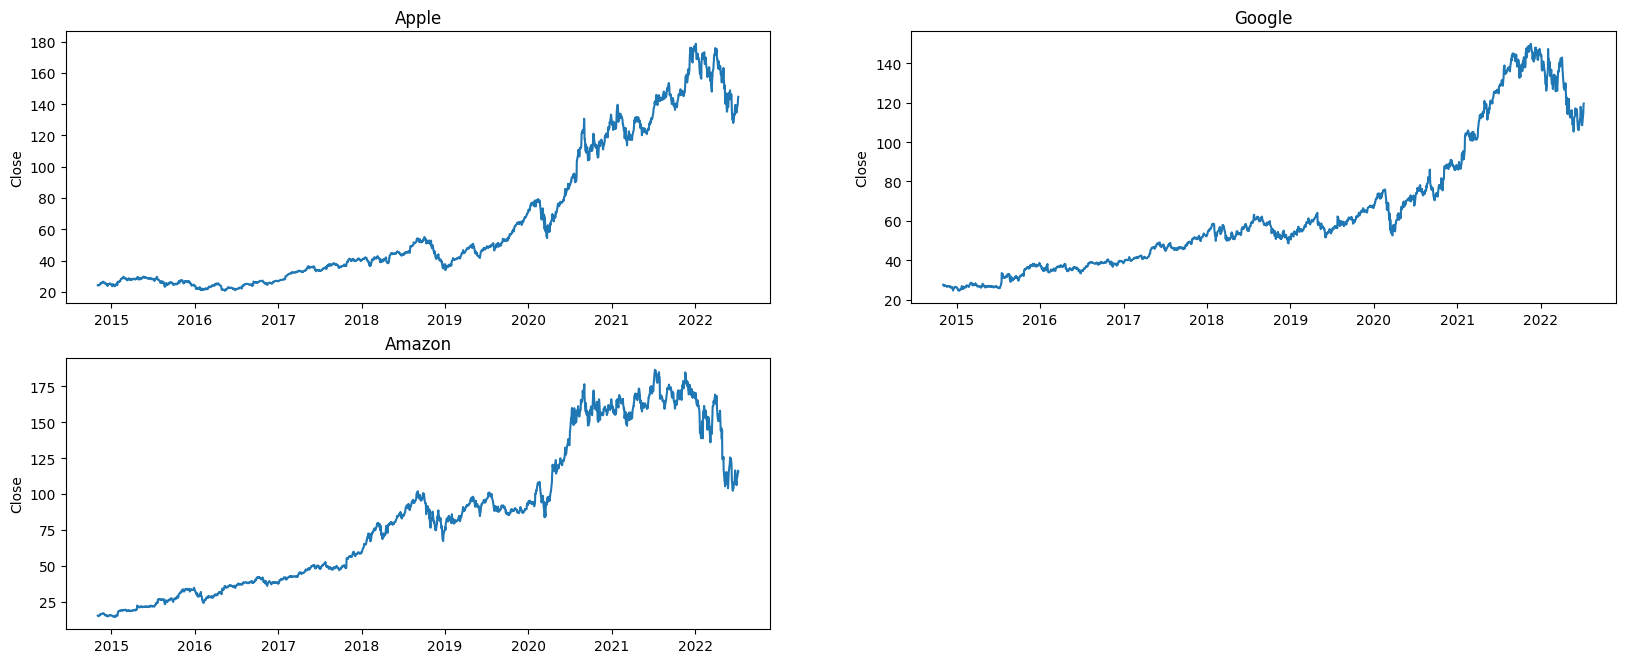

In [32]:
# Lets view historical view of the closing prices

plt.figure(figsize=(20, 12))
for index, company in enumerate(Companies):
  plt.subplot(3, 2, index + 1)
  plt.plot(company["Date"], company["Close"])
  plt.title(Companies_Title[index])
  plt.ylabel('Close')

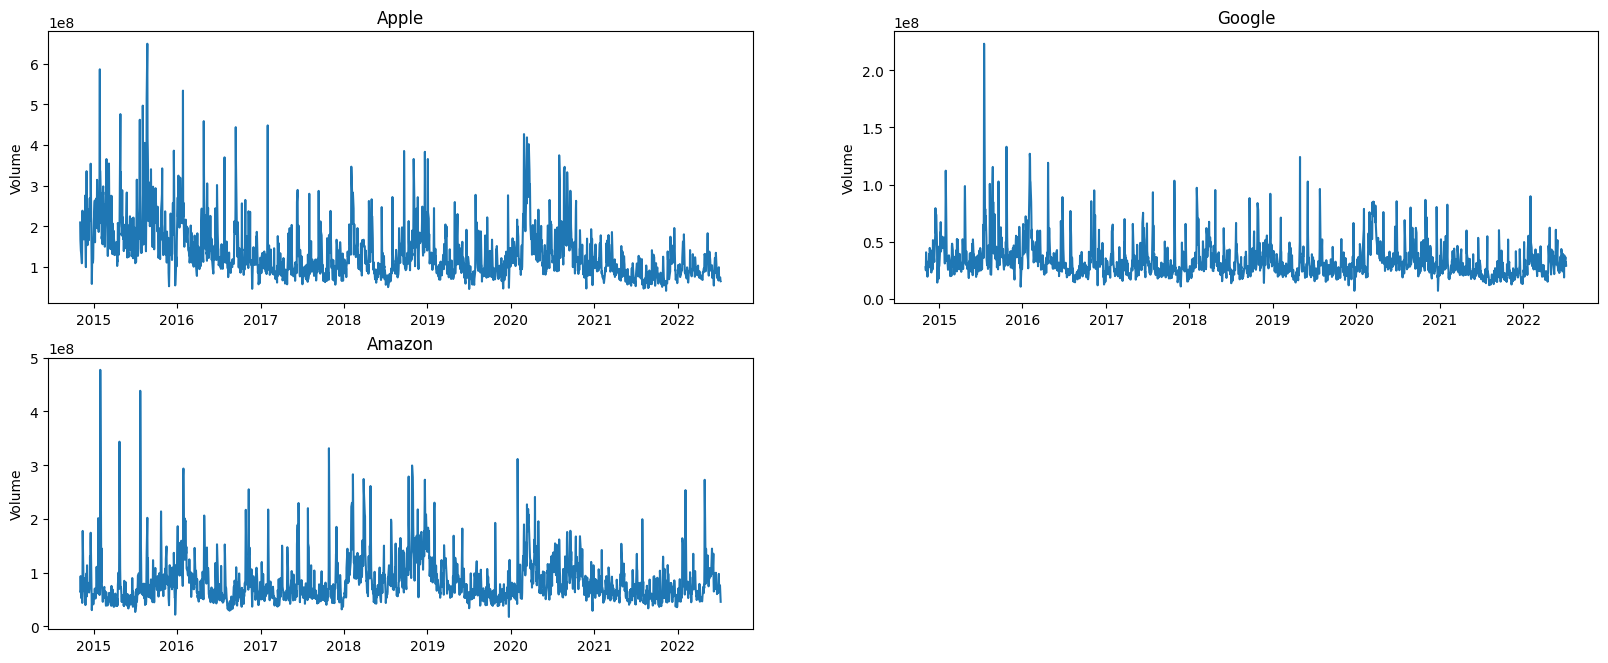

In [33]:
# Now lets plot the total volume of stock being traded each day 

plt.figure(figsize=(20, 12))
for index, company in enumerate(Companies):
  plt.subplot(3, 2, index + 1)
  plt.plot(company["Date"], company["Volume"])
  plt.title(Companies_Title[index])
  plt.ylabel('Volume')

### What was the moving average of the various stocks ?

In [35]:
Moving_Average_Day = [10, 20, 50]
for Moving_Average in Moving_Average_Day:
  for company in Companies:
    column_name = f'Moving Average for {Moving_Average} days'
    company[column_name] = company["Close"].rolling(Moving_Average).mean()

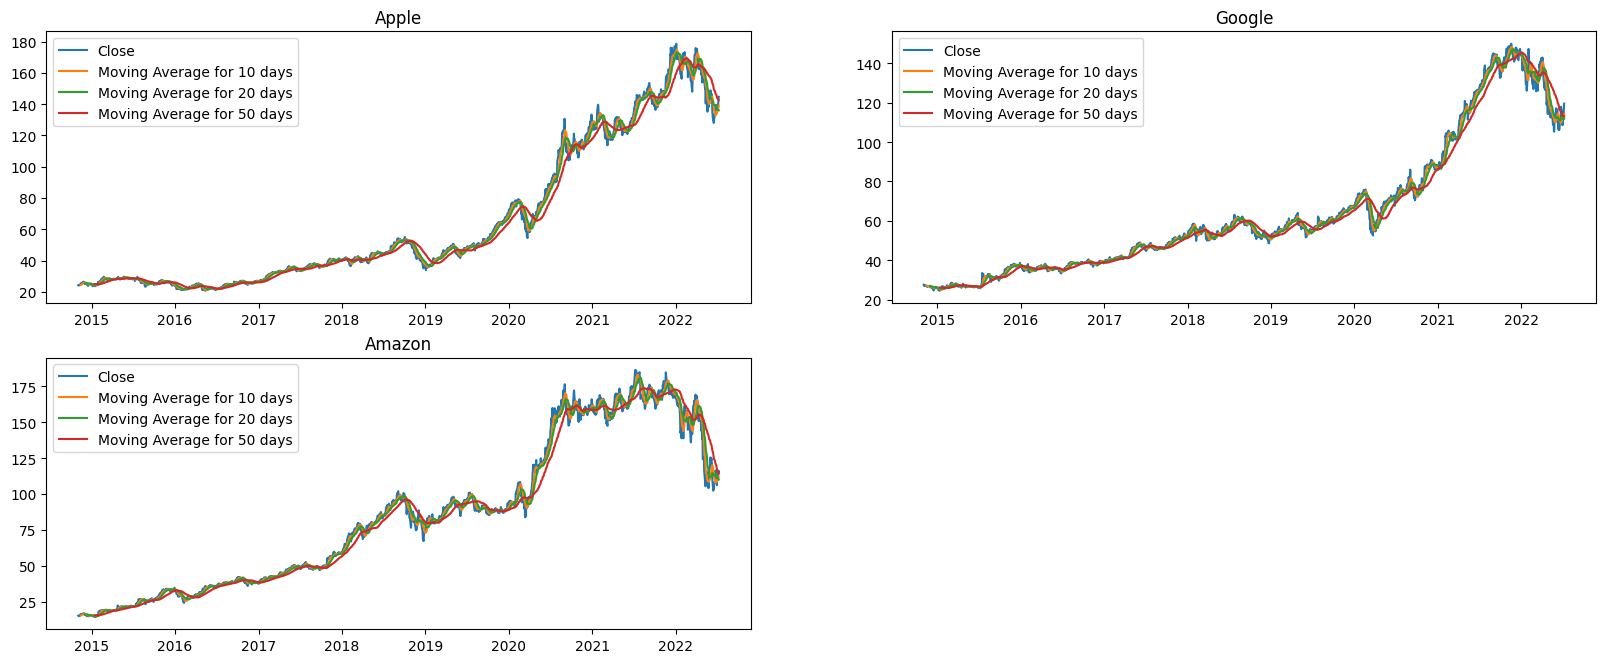

In [36]:
plt.figure(figsize=(20, 12))
for index, company in enumerate(Companies):
  plt.subplot(3, 2, index + 1)
  plt.plot(company["Date"], company["Close"])
  plt.plot(company["Date"], company["Moving Average for 10 days"])
  plt.plot(company["Date"], company["Moving Average for 20 days"])
  plt.plot(company["Date"], company["Moving Average for 50 days"])
  plt.title(Companies_Title[index])
  plt.legend(("Close", "Moving Average for 10 days", "Moving Average for 20 days", "Moving Average for 50 days"))

### What was the daily return of the stock on average ?

##### Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value.

In [39]:
# pct_change() function calculates the percentage change between the current and a prior element.
# This function by default calculates the percentage change from the immediately previous row. 

for company in Companies:
  company["Daily Return"] = company["Close"].pct_change()

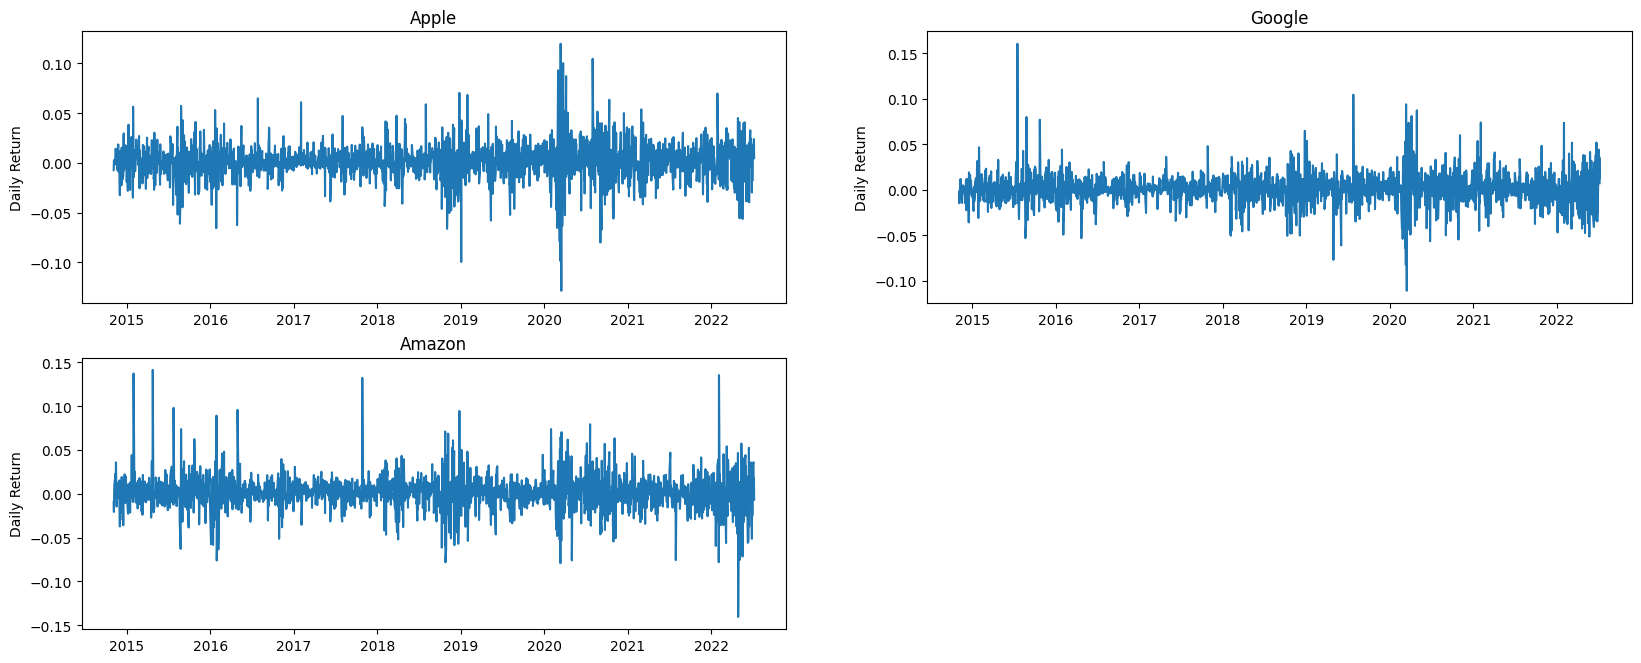

In [40]:
plt.figure(figsize=(20, 12))
for index, company in enumerate(Companies):
  plt.subplot(3, 2, index + 1)
  plt.plot(company["Date"], company["Daily Return"])
  plt.title(Companies_Title[index])
  plt.ylabel('Daily Return')

#### Now, let's get an overall at the average daily return using a histogram.

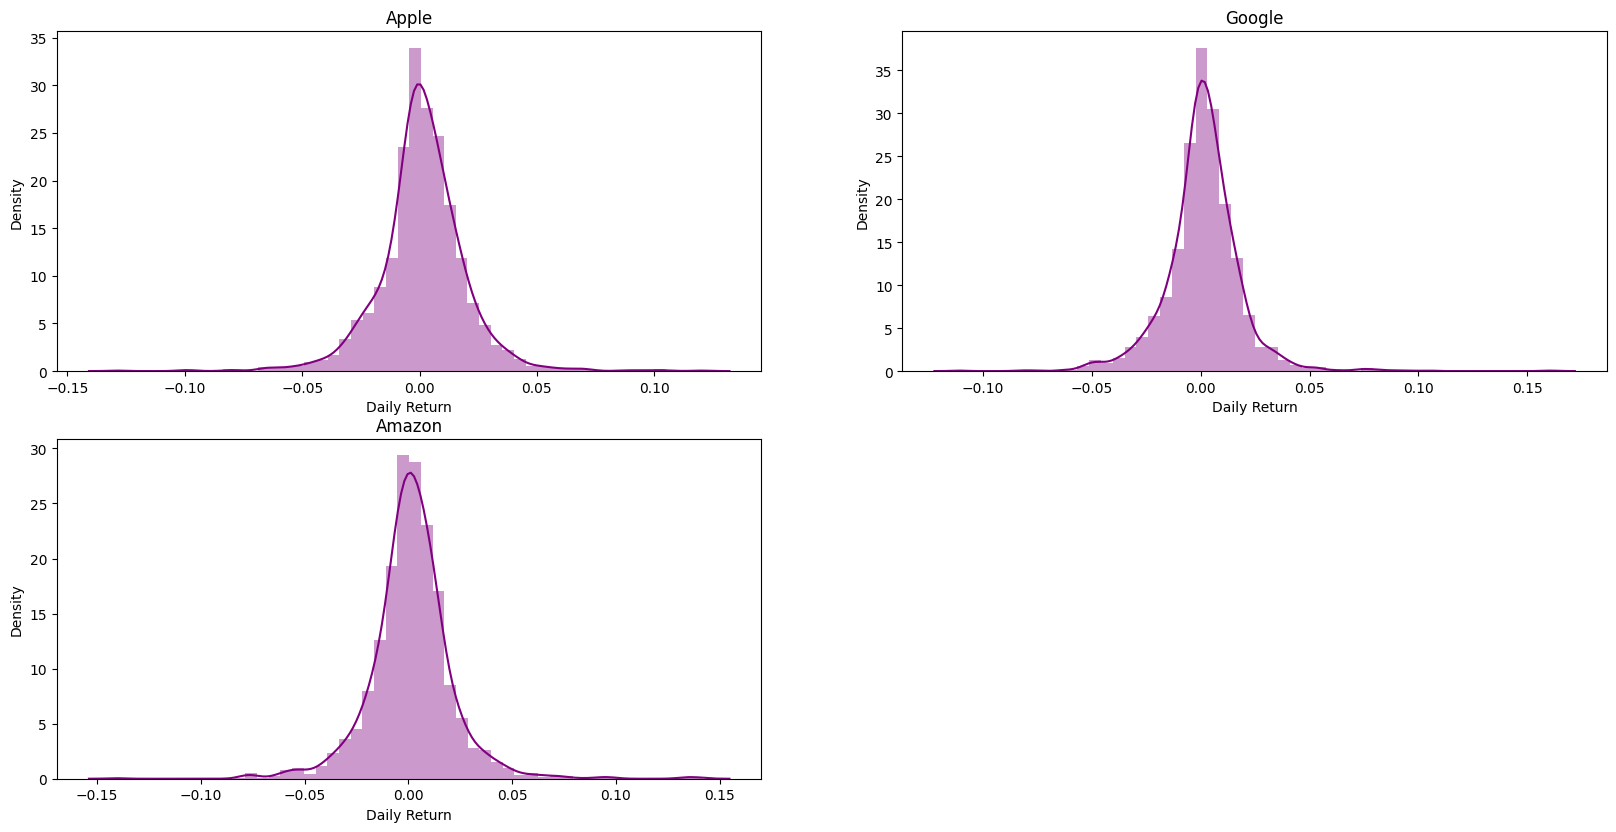

In [42]:
# distplot is a deprecated function, so to ignore warnings, the filterwarnings function is used.

import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(20, 15))
for index, company in enumerate(Companies):
  plt.subplot(3, 2, index + 1)
  sns.distplot(company["Daily Return"].dropna(), color = "purple")
  plt.title(Companies_Title[index])

##### Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution. In other words kurtosis identifies whether the tails of a given distribution contain extreme values.

In [44]:
print("Kurtosis Value")
for index, company in enumerate(Companies):
  print(f'{Companies_Title[index]}: {company["Daily Return"].kurtosis()}')

Kurtosis Value
Apple: 5.4648103528343155
Google: 8.138515598874903
Amazon: 7.3159177806372275


#### The above graph and the positive kurtosis value indicate that getting extreme daily return values is rare.

#### What was the correlation between diffrent stocks closing price ?

In [47]:
# Companies_return contain closing price of all the companies
Companies_returns = pd.DataFrame()
Companies_returns["AAPL"] = AAPL["Close"]
Companies_returns["GOOG"] = GOOG["Close"]
Companies_returns["AMZN"] = AMZN["Close"]
Companies_returns.head()

,AAPL,GOOG,AMZN
0,24.199203,27.554480,15.2860
1,24.022238,27.499392,15.1405
2,24.079750,27.092941,14.8260
3,24.148623,26.900383,14.8320
4,24.217487,26.849268,14.9930


In [48]:
# Companies_Daily_returns contains percentage daily returns of all the companies
Companies_Daily_returns = Companies_returns.pct_change()
Companies_Daily_returns.head()

,AAPL,GOOG,AMZN
0,NaN,NaN,NaN
1,-0.007313,-0.001999,-0.009519
2,0.002394,-0.014780,-0.020772
3,0.002860,-0.007107,0.000405
4,0.002852,-0.001900,0.010855


### Now, let's do a correlation plot, to get actual numerical values for the correlation between the stocks closing price

<Axes: >

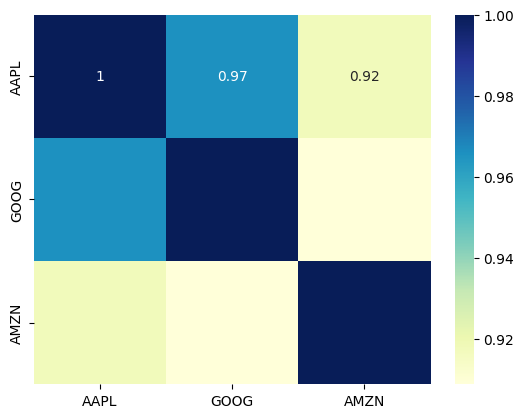

In [50]:
sns.heatmap(Companies_returns.corr(), annot=True, cmap="YlGnBu")

#### Finally, let's do a correlation plot, to get actual numerical values for the correlation between the stocks daily returns.

<Axes: >

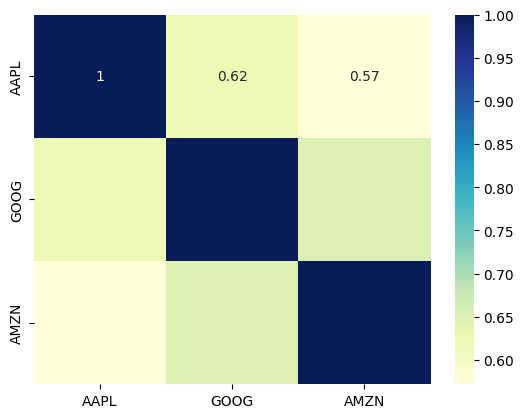

In [52]:
sns.heatmap(Companies_Daily_returns.corr(), annot=True, cmap="YlGnBu")

#### How much value do we put at risk by investing in a paticular stock ?

#### There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

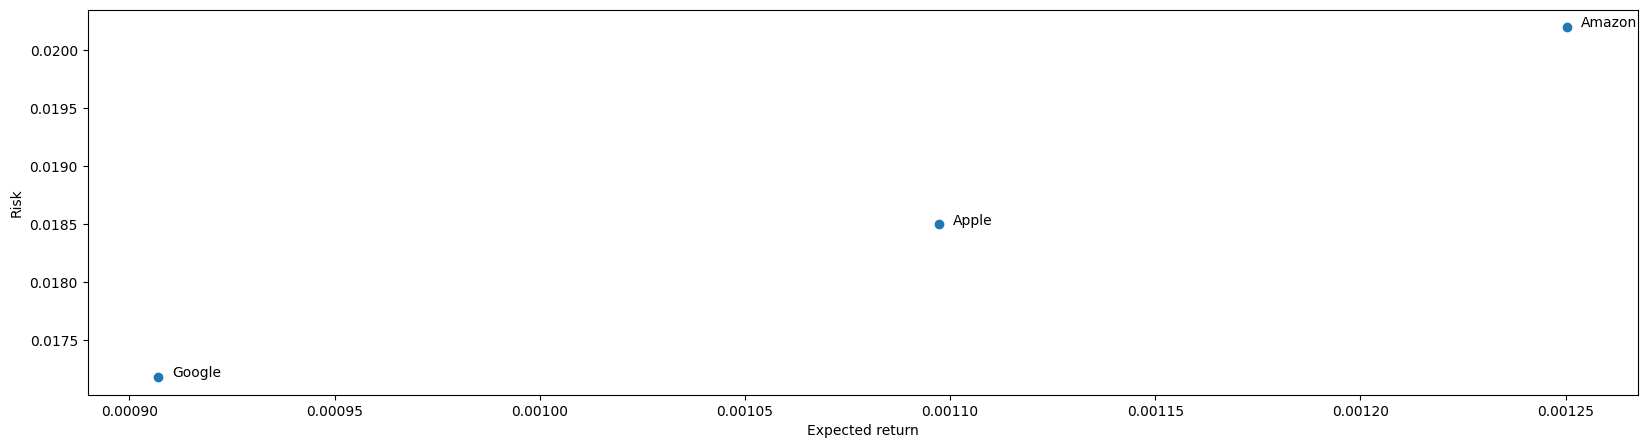

In [55]:
Returns = Companies_Daily_returns.dropna()

plt.figure(figsize=(20, 5))
plt.scatter(Returns.mean(), Returns.std())
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(Companies_Title, Returns.mean(), Returns.std()):
    plt.annotate(label, xy = (x, y), xytext = (10, 0), textcoords = 'offset points')
     

#### From the above graph, we can see that Amazon has the highest expected returns and the highest risk factor. Google has the lowest expected returns and the lowest risk factor.

In [58]:
AAPL.to_csv('preprocessed_AAPL.csv',index=False)
AMZN.to_csv('preprocessed_AMZN.csv',index=False)
GOOG.to_csv('preprocessed_GOOG.csv',index=False)

In [59]:
AAPL = pd.read_csv("preprocessed_AAPL.csv")
AAPL.head()

,Date,Close,High,Low,Open,Volume,Moving Average for 10 days,Moving Average for 20 days,Moving Average for 50 days,Daily Return
0,2014-11-03,24.199203,24.398283,23.891737,23.938188,209130400.0,NaN,NaN,NaN,NaN
1,2014-11-04,24.022238,24.219105,23.827583,24.190350,166297600.0,NaN,NaN,NaN,-0.007313
2,2014-11-05,24.079750,24.177078,23.918274,24.132837,149743600.0,NaN,NaN,NaN,0.002394
3,2014-11-06,24.148623,24.168618,23.948681,24.126407,139874000.0,NaN,NaN,NaN,0.002860
4,2014-11-07,24.217487,24.286356,24.115295,24.159726,134766000.0,NaN,NaN,NaN,0.002852


In [60]:
GOOG=pd.read_csv("preprocessed_GOOG.csv")
GOOG.head()

,Date,Close,High,Low,Open,Volume,Moving Average for 10 days,Moving Average for 20 days,Moving Average for 50 days,Daily Return
0,2014-11-03,27.554480,27.687482,27.455719,27.568376,27645693.0,NaN,NaN,NaN,NaN
1,2014-11-04,27.499392,27.568376,27.260681,27.444305,24884132.0,NaN,NaN,NaN,-0.001999
2,2014-11-05,27.092941,27.632895,27.000136,27.632895,40645286.0,NaN,NaN,NaN,-0.014780
3,2014-11-06,26.900383,27.140831,26.847280,27.072095,26665008.0,NaN,NaN,NaN,-0.007107
4,2014-11-07,26.849268,27.107333,26.733138,27.107333,32675465.0,NaN,NaN,NaN,-0.001900


In [61]:
AMZN= pd.read_csv("preprocessed_AMZN.csv")
AMZN.head()

,Date,Close,High,Low,Open,Volume,Moving Average for 10 days,Moving Average for 20 days,Moving Average for 50 days,Daily Return
0,2014-11-03,15.2860,15.4005,15.1620,15.3120,64850000.0,NaN,NaN,NaN,NaN
1,2014-11-04,15.1405,15.2125,15.0085,15.1995,68548000.0,NaN,NaN,NaN,-0.009519
2,2014-11-05,14.8260,15.2000,14.7080,15.1505,93490000.0,NaN,NaN,NaN,-0.020772
3,2014-11-06,14.8320,14.8500,14.6145,14.8345,75162000.0,NaN,NaN,NaN,0.000405
4,2014-11-07,14.9930,14.9995,14.8145,14.8910,52948000.0,NaN,NaN,NaN,0.010855


In [62]:
AMZN.tail()

,Date,Close,High,Low,Open,Volume,Moving Average for 10 days,Moving Average for 20 days,Moving Average for 50 days,Daily Return
1928,2022-07-01,109.559998,109.750000,105.849998,106.290001,73021200.0,109.806,111.6245,116.535501,0.031541
1929,2022-07-05,113.500000,114.080002,106.320000,107.599998,76583700.0,110.534,111.1820,115.839581,0.035962
1930,2022-07-06,114.330002,115.480003,112.010002,113.209999,66958900.0,111.099,110.6590,115.239180,0.007313
1931,2022-07-07,116.330002,116.989998,113.489998,113.849998,57872300.0,111.837,110.3255,114.644300,0.017493
1932,2022-07-08,115.540001,116.580002,113.690002,114.599998,45719700.0,112.147,110.0435,114.167280,-0.006791


In [114]:
AMZN.drop(["Moving Average for 20 days","Moving Average for 50 days","Daily Return"],axis=1,inplace=True)

In [116]:
AMZN

,Date,Close,High,Low,Open,Volume
0,2014-11-03,15.286000,15.400500,15.162000,15.312000,64850000.0
1,2014-11-04,15.140500,15.212500,15.008500,15.199500,68548000.0
2,2014-11-05,14.826000,15.200000,14.708000,15.150500,93490000.0
3,2014-11-06,14.832000,14.850000,14.614500,14.834500,75162000.0
4,2014-11-07,14.993000,14.999500,14.814500,14.891000,52948000.0
...,...,...,...,...,...,...
1928,2022-07-01,109.559998,109.750000,105.849998,106.290001,73021200.0
1929,2022-07-05,113.500000,114.080002,106.320000,107.599998,76583700.0
1930,2022-07-06,114.330002,115.480003,112.010002,113.209999,66958900.0
1931,2022-07-07,116.330002,116.989998,113.489998,113.849998,57872300.0


In [118]:
AMZN.to_csv("amzn_2025.csv")

In [120]:
GOOG.drop(["Moving Average for 10 days","Moving Average for 20 days","Moving Average for 50 days","Daily Return"],axis=1,inplace=True)

In [122]:
GOOG

,Date,Close,High,Low,Open,Volume
0,2014-11-03,27.554480,27.687482,27.455719,27.568376,27645693.0
1,2014-11-04,27.499392,27.568376,27.260681,27.444305,24884132.0
2,2014-11-05,27.092941,27.632895,27.000136,27.632895,40645286.0
3,2014-11-06,26.900383,27.140831,26.847280,27.072095,26665008.0
4,2014-11-07,26.849268,27.107333,26.733138,27.107333,32675465.0
...,...,...,...,...,...,...
1928,2022-07-01,108.566780,109.288710,106.600097,107.826284,31028000.0
1929,2022-07-05,113.350128,113.514944,105.748627,107.007671,36398000.0
1930,2022-07-06,114.670372,115.803501,111.721342,113.554161,28852000.0
1931,2022-07-07,118.743568,119.296947,114.989347,115.461119,32184000.0


In [124]:
GOOG.to_csv("goog_2025.csv")

In [126]:
AAPL.drop(["Moving Average for 10 days","Moving Average for 20 days","Moving Average for 50 days","Daily Return"],axis=1,inplace=True)

In [128]:
AAPL

,Date,Close,High,Low,Open,Volume
0,2014-11-03,24.199203,24.398283,23.891737,23.938188,209130400.0
1,2014-11-04,24.022238,24.219105,23.827583,24.190350,166297600.0
2,2014-11-05,24.079750,24.177078,23.918274,24.132837,149743600.0
3,2014-11-06,24.148623,24.168618,23.948681,24.126407,139874000.0
4,2014-11-07,24.217487,24.286356,24.115295,24.159726,134766000.0
...,...,...,...,...,...,...
1928,2022-07-01,136.736298,136.844561,133.517941,133.891931,71051600.0
1929,2022-07-05,139.324768,139.373982,134.767871,135.594619,73353800.0
1930,2022-07-06,140.663284,141.844333,138.852342,139.118082,74064300.0
1931,2022-07-07,144.039139,144.235978,141.017607,141.027444,66253700.0


In [130]:
AAPL.to_csv("aapl_2025.csv")